In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


In [3]:
df_train = pd.read_csv('D:/MyGit/mykagglesubmissions/EmployeeAccess/train.csv')
df_test = pd.read_csv('D:/MyGit/mykagglesubmissions/EmployeeAccess/test.csv')

In [4]:
df_train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [6]:
# import copy

# dfTarget = copy.deepcopy(dfSource)
df = df_train.copy(deep=True)

print('\nColumns:\n',df.columns)
print('\nData types:\n',df.dtypes)
print('\nSize:\n',df.size)
print('\nShape:\n',df.shape)
print('\nHead(5):\n',df.head())
print('\nTail(5):\n',df.tail())
print('\nNull checks:\n',df.isnull().sum())
print('\nDescribe:\n',df.describe().T)



Columns:
 Index(['ACTION', 'RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2',
       'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY',
       'ROLE_CODE'],
      dtype='object')

Data types:
 ACTION              int64
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object

Size:
 327690

Shape:
 (32769, 10)

Head(5):
    ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
0       1     39353   85475         117961         118300         123472   
1       1     17183    1540         117961         118343         123125   
2       1     36724   14457         118219         118220         117884   
3       1     36135    5396         117961         118343         119993   
4       1     42680    5905         117929         117930         119569   

   ROLE_

In [7]:
df = df_train.copy(deep=True)

In [8]:
df['ACTION'].replace({1: 'GRANTED', 0: 'RESTRICTED'}, inplace=True)

In [9]:
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,GRANTED,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,GRANTED,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,GRANTED,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,GRANTED,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,GRANTED,42680,5905,117929,117930,119569,119323,123932,19793,119325


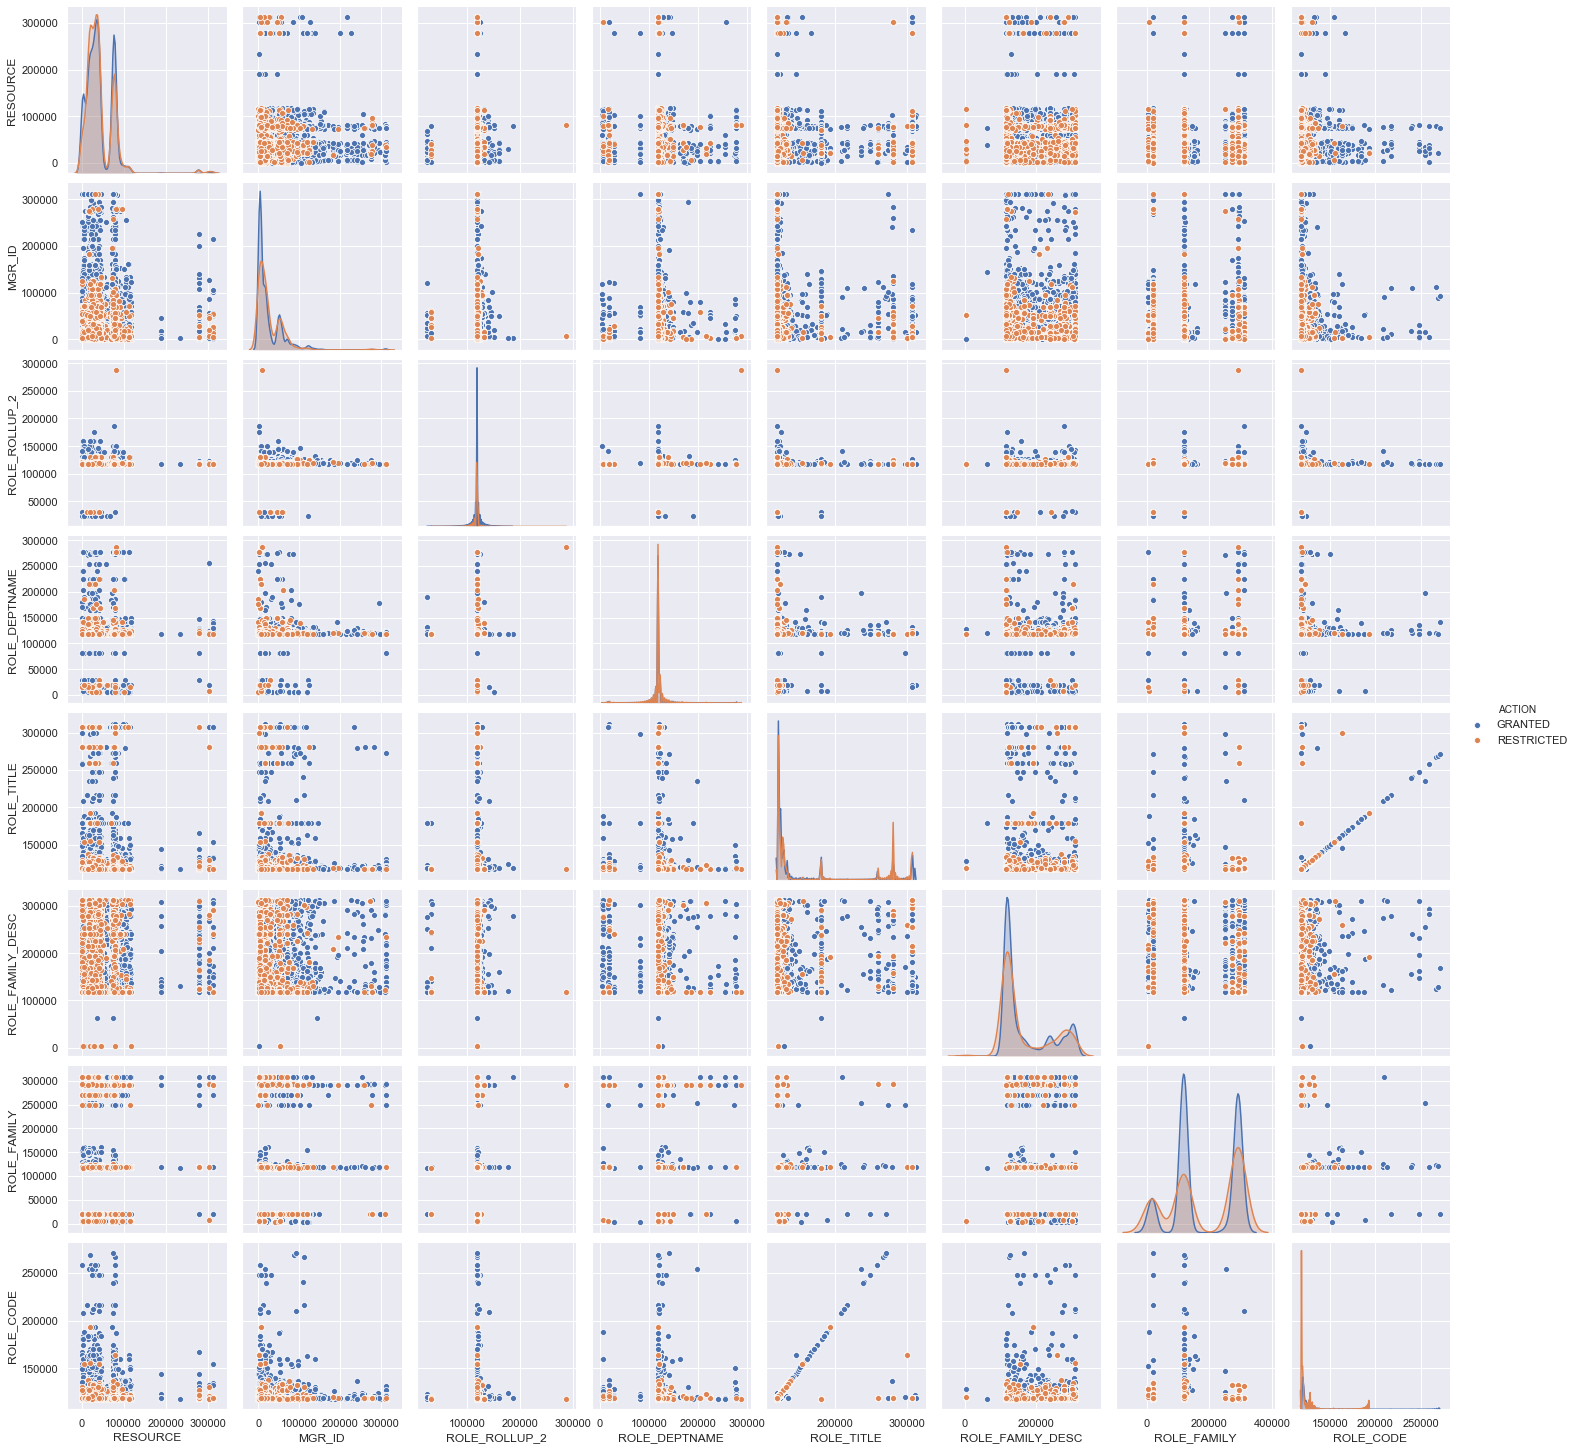

In [17]:
sns.pairplot(df[['ACTION','RESOURCE','MGR_ID','ROLE_ROLLUP_2','ROLE_DEPTNAME','ROLE_TITLE','ROLE_FAMILY_DESC','ROLE_FAMILY','ROLE_CODE']], hue='ACTION')

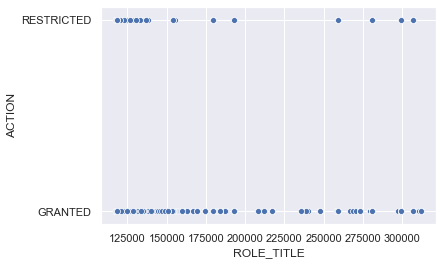

In [12]:
sns.scatterplot(x = 'ROLE_TITLE', y = 'ACTION', data = df)

In [13]:
corr = df.corr()

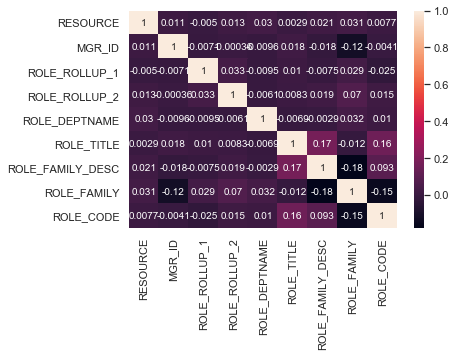

In [15]:
sns.heatmap(corr, annot=True)

In [18]:
y_train = df_train['ACTION'].copy(deep='True')

In [19]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
32764    1
32765    1
32766    1
32767    1
32768    1
Name: ACTION, Length: 32769, dtype: int64

In [28]:
X_train = df_train.drop(columns= ['ACTION','ROLE_ROLLUP_1'], inplace=True)

KeyError: "['ACTION' 'ROLE_ROLLUP_1'] not found in axis"

In [29]:
X_train = df_train

In [21]:
df_test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [22]:
id_column = df_test['id'].copy(deep='True')

In [23]:
X_test = df_test.drop(columns= ['id','ROLE_ROLLUP_1'], inplace=True)

In [27]:
X_test = df_test

In [30]:
X_train

,RESOURCE,MGR_ID,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,118300,123472,117905,117906,290919,117908
1,17183,1540,118343,123125,118536,118536,308574,118539
2,36724,14457,118220,117884,117879,267952,19721,117880
3,36135,5396,118343,119993,118321,240983,290919,118322
4,42680,5905,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...
32764,23497,16971,118300,119993,118321,240983,290919,118322
32765,25139,311198,118026,122392,121143,173805,249618,121145
32766,34924,28805,118327,120299,124922,152038,118612,124924
32767,80574,55643,118257,117945,280788,280788,292795,119082


In [31]:
X_test

,RESOURCE,MGR_ID,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118080,117878,117879,118177,19721,117880
1,40644,4378,118327,118507,118863,122008,118398,118865
2,75443,2395,118300,119488,118172,301534,249618,118175
3,43219,19986,118225,118403,120773,136187,118960,120774
4,42093,50015,118343,119598,118422,300136,118424,118425
...,...,...,...,...,...,...,...,...
58916,75078,4565,118386,121961,118784,117906,290919,118786
58917,6977,72209,118225,124948,118054,118054,117887,118055
58918,39262,6114,118343,6104,118278,118260,290919,118279
58919,1023,8674,118327,120318,118321,117906,290919,118322


In [32]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
32764    1
32765    1
32766    1
32767    1
32768    1
Name: ACTION, Length: 32769, dtype: int64

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [34]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_test_predict = model.predict(X_test)
# y_train_predict = model.predict(X_train)


In [36]:
print('Training Score: ', model.score(X_train, y_train))
# print('Testing Score: ', model.score(X_test, y_test))

# from sklearn.metrics import accuracy_score
# print('Accuracy: ',accuracy_score(y_test, y_test_predict))


Training Score:  0.9421099209618847


In [37]:
y_test_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
df = pd.concat([id_column, y_test_predict], axis=1, ignore_index=True)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [41]:
ss = pd.Series(id_column, index=['id'])

In [43]:
id_column

0            1
1            2
2            3
3            4
4            5
         ...  
58916    58917
58917    58918
58918    58919
58919    58920
58920    58921
Name: id, Length: 58921, dtype: int64

In [50]:

pd.DataFrame(id_column)


,id
0,1
1,2
2,3
3,4
4,5
...,...
58916,58917
58917,58918
58918,58919
58919,58920


In [52]:
df = pd.concat([pd.DataFrame(id_column), pd.DataFrame(y_test_predict)], axis=1, ignore_index=True)

In [53]:
df

,0,1
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
58916,58917,1
58917,58918,1
58918,58919,1
58919,58920,1


In [54]:
df.columns = ['Id', 'Action']

In [55]:
df.head()

,Id,Action
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [57]:
df.to_csv('EmployeeAccess.csv')